## Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.

In [1]:
!pip install tensorflow

In [3]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.12.0


## Q2. Load the Wine Quality dataset and explore its dimensions.
Dataset link: https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv("data\wine.csv")

In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [8]:
df.shape

(1599, 12)

## Q3. Check for null values, identify categorical variables, and encode them.

In [14]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## No Null Values in Datasets

In [29]:
# Print the number of unique values in the "quality" column
quality_unique_values = df["quality"].unique()
print(f"Unique values in the 'quality' column: {quality_unique_values}")


Unique values in the 'quality' column: ['bad' 'good']


## Here target Varaible is 'quality'is catagorical variable

In [35]:
map_target = {
    'bad': 0,
    'good': 1
}

df['quality'] = df['quality'].map(map_target)

## Mapping target variable

In [36]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


## Q4. Separate the features and target variables from the dataframe.

In [39]:
X = df.drop(["quality"],axis=1)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [40]:
y = df.quality
y

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int64

## Q5. Perform a train-test split and divide the data into training, validation, and test datasets.

In [41]:
from sklearn.model_selection import train_test_split

# Assuming you have already loaded and preprocessed your dataset into features (X) and target (y)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Training set shape: (1023, 11)
Validation set shape: (256, 11)
Test set shape: (320, 11)


## Q6. Perform scaling on the dataset.

In [42]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Assuming you have already divided your data into X_train, X_val, and X_test

# Min-Max Scaling (Normalization)
min_max_scaler = MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_val_scaled = min_max_scaler.transform(X_val)
X_test_scaled = min_max_scaler.transform(X_test)

# Standardization
standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train)
X_val_scaled = standard_scaler.transform(X_val)
X_test_scaled = standard_scaler.transform(X_test)

In [45]:
# Print the shapes of the resulting datasets
print("Scaled Training set shape:", X_train_scaled.shape)
print("Scaled Validation set shape:", X_val_scaled.shape)
print("Scaled Test set shape:", X_test_scaled.shape)

Scaled Training set shape: (1023, 11)
Scaled Validation set shape: (256, 11)
Scaled Test set shape: (320, 11)


## Q7. Create at least 2 hidden layers and an output layer for the binary categorical variables.

In [47]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Assuming you have already scaled your data and split it into X_train_scaled, X_val_scaled, and X_test_scaled

# Define the model
model = keras.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(11,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

## Q8. Create a Sequential model and add all the layers to it.

In [49]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, batch_size=32, epochs=10, validation_data=(X_val_scaled, y_val))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

Epoch 1/10
32/32 [==============================] - 2s 22ms/step - loss: 0.6231 - accuracy: 0.6882 - val_loss: 0.5864 - val_accuracy: 0.7305
Epoch 2/10
32/32 [==============================] - 0s 8ms/step - loss: 0.5435 - accuracy: 0.7410 - val_loss: 0.5503 - val_accuracy: 0.7344
Epoch 3/10
32/32 [==============================] - 0s 5ms/step - loss: 0.5125 - accuracy: 0.7478 - val_loss: 0.5423 - val_accuracy: 0.7734
Epoch 4/10
32/32 [==============================] - 0s 7ms/step - loss: 0.4990 - accuracy: 0.7517 - val_loss: 0.5352 - val_accuracy: 0.7812
Epoch 5/10
32/32 [==============================] - 0s 6ms/step - loss: 0.4905 - accuracy: 0.7634 - val_loss: 0.5275 - val_accuracy: 0.7891
Epoch 6/10
32/32 [==============================] - 0s 9ms/step - loss: 0.4837 - accuracy: 0.7674 - val_loss: 0.5270 - val_accuracy: 0.7969
Epoch 7/10
32/32 [==============================] - 0s 6ms/step - loss: 0.4776 - accuracy: 0.7693 - val_loss: 0.5221 - val_accuracy: 0.7812
Epoch 8/10
32/32 [=

## Q9. Implement a TensorBoard callback to visualize and monitor the model's training process.

In [50]:
from tensorflow.keras.callbacks import TensorBoard

# Assuming you have already prepared and scaled your data

# Define the model
model = keras.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(11,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Create a TensorBoard callback
tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)

# Train the model with TensorBoard callback
model.fit(X_train_scaled, y_train, batch_size=32, epochs=10, validation_data=(X_val_scaled, y_val), callbacks=[tensorboard_callback])

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)


Epoch 1/10
32/32 [==============================] - 3s 36ms/step - loss: 0.6208 - accuracy: 0.6725 - val_loss: 0.5937 - val_accuracy: 0.7148
Epoch 2/10
32/32 [==============================] - 1s 18ms/step - loss: 0.5335 - accuracy: 0.7302 - val_loss: 0.5620 - val_accuracy: 0.7461
Epoch 3/10
32/32 [==============================] - 1s 17ms/step - loss: 0.5121 - accuracy: 0.7429 - val_loss: 0.5446 - val_accuracy: 0.7734
Epoch 4/10
32/32 [==============================] - 1s 21ms/step - loss: 0.5022 - accuracy: 0.7439 - val_loss: 0.5366 - val_accuracy: 0.7812
Epoch 5/10
32/32 [==============================] - 0s 16ms/step - loss: 0.4923 - accuracy: 0.7595 - val_loss: 0.5478 - val_accuracy: 0.7656
Epoch 6/10
32/32 [==============================] - 1s 17ms/step - loss: 0.4864 - accuracy: 0.7556 - val_loss: 0.5303 - val_accuracy: 0.7891
Epoch 7/10
32/32 [==============================] - 1s 17ms/step - loss: 0.4818 - accuracy: 0.7586 - val_loss: 0.5455 - val_accuracy: 0.7812
Epoch 8/10
32

##  Q10. Use Early Stopping to prevent overfitting by monitoring a chosen metric and stopping the training ifno improvement is observed.

In [51]:
from tensorflow.keras.callbacks import EarlyStopping

# Assuming you have already prepared and scaled your data

# Define the model
model = keras.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(11,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Create an EarlyStopping callback
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

# Train the model with EarlyStopping callback
model.fit(X_train_scaled, y_train, batch_size=32, epochs=10, validation_data=(X_val_scaled, y_val), callbacks=[early_stopping_callback])

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)


Epoch 1/10
32/32 [==============================] - 2s 16ms/step - loss: 0.5987 - accuracy: 0.7097 - val_loss: 0.5617 - val_accuracy: 0.7305
Epoch 2/10
32/32 [==============================] - 0s 6ms/step - loss: 0.5310 - accuracy: 0.7370 - val_loss: 0.5379 - val_accuracy: 0.7461
Epoch 3/10
32/32 [==============================] - 0s 6ms/step - loss: 0.5095 - accuracy: 0.7449 - val_loss: 0.5374 - val_accuracy: 0.7617
Epoch 4/10
32/32 [==============================] - 0s 7ms/step - loss: 0.4961 - accuracy: 0.7576 - val_loss: 0.5311 - val_accuracy: 0.7617
Epoch 5/10
32/32 [==============================] - 0s 6ms/step - loss: 0.4866 - accuracy: 0.7654 - val_loss: 0.5267 - val_accuracy: 0.7734
Epoch 6/10
32/32 [==============================] - 0s 5ms/step - loss: 0.4798 - accuracy: 0.7693 - val_loss: 0.5341 - val_accuracy: 0.7734
Epoch 7/10
32/32 [==============================] - 0s 6ms/step - loss: 0.4747 - accuracy: 0.7732 - val_loss: 0.5308 - val_accuracy: 0.7891
Epoch 8/10
10/10 [=

## Q11. Implement a ModelCheckpoint callback to save the best model based on a chosen metric during training.

In [52]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Assuming you have already prepared and scaled your data

# Define the model
model = keras.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(11,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Create a ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model with ModelCheckpoint callback
model.fit(X_train_scaled, y_train, batch_size=32, epochs=10, validation_data=(X_val_scaled, y_val), callbacks=[checkpoint_callback])

# Load the best saved model
best_model = keras.models.load_model('best_model.h5')

# Evaluate the best model on the test set
loss, accuracy = best_model.evaluate(X_test_scaled, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)


Epoch 1/10
32/32 [==============================] - 2s 16ms/step - loss: 0.6263 - accuracy: 0.6598 - val_loss: 0.6039 - val_accuracy: 0.7188
Epoch 2/10
32/32 [==============================] - 0s 11ms/step - loss: 0.5377 - accuracy: 0.7302 - val_loss: 0.5602 - val_accuracy: 0.7500
Epoch 3/10
32/32 [==============================] - 0s 6ms/step - loss: 0.5122 - accuracy: 0.7439 - val_loss: 0.5568 - val_accuracy: 0.7656
Epoch 4/10
32/32 [==============================] - 0s 6ms/step - loss: 0.4991 - accuracy: 0.7429 - val_loss: 0.5456 - val_accuracy: 0.7773
Epoch 5/10
32/32 [==============================] - 0s 7ms/step - loss: 0.4923 - accuracy: 0.7566 - val_loss: 0.5430 - val_accuracy: 0.7812
Epoch 6/10
32/32 [==============================] - 0s 5ms/step - loss: 0.4838 - accuracy: 0.7605 - val_loss: 0.5433 - val_accuracy: 0.7734
Epoch 7/10
32/32 [==============================] - 0s 8ms/step - loss: 0.4779 - accuracy: 0.7615 - val_loss: 0.5427 - val_accuracy: 0.7695
Epoch 8/10
32/32 [

## Q12. Print the model summary.

In [53]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                768       
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,993
Trainable params: 4,993
Non-trainable params: 0
_________________________________________________________________


## Q13. Use binary cross-entropy as the loss function, Adam optimizer, and include the metric ['accuracy'].

In [56]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Q14. Compile the model with the specified loss function, optimizer, and metrics.

In [57]:
model.fit(X_train_scaled, y_train, batch_size=32, epochs=10, validation_data=(X_val_scaled, y_val))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

Epoch 1/10
32/32 [==============================] - 2s 14ms/step - loss: 0.4261 - accuracy: 0.7849 - val_loss: 0.5666 - val_accuracy: 0.7812
Epoch 2/10
32/32 [==============================] - 0s 5ms/step - loss: 0.4221 - accuracy: 0.7967 - val_loss: 0.5633 - val_accuracy: 0.7852
Epoch 3/10
32/32 [==============================] - 0s 5ms/step - loss: 0.4175 - accuracy: 0.7908 - val_loss: 0.5721 - val_accuracy: 0.7852
Epoch 4/10
32/32 [==============================] - 0s 6ms/step - loss: 0.4179 - accuracy: 0.8006 - val_loss: 0.5620 - val_accuracy: 0.7734
Epoch 5/10
32/32 [==============================] - 0s 5ms/step - loss: 0.4119 - accuracy: 0.8025 - val_loss: 0.5619 - val_accuracy: 0.7930
Epoch 6/10
32/32 [==============================] - 0s 5ms/step - loss: 0.4083 - accuracy: 0.8035 - val_loss: 0.5665 - val_accuracy: 0.7734
Epoch 7/10
32/32 [==============================] - 0s 7ms/step - loss: 0.4067 - accuracy: 0.7996 - val_loss: 0.5742 - val_accuracy: 0.7930
Epoch 8/10
32/32 [=

## Q15. Fit the model to the data, incorporating the TensorBoard, Early Stopping, and ModelCheckpoint callbacks.

In [59]:
# Define the model
model = keras.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(11,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Create a TensorBoard callback
tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)

# Create an EarlyStopping callback
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

# Create a ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Fit the model with callbacks
model.fit(X_train_scaled, y_train, batch_size=32, epochs=10, validation_data=(X_val_scaled, y_val),
          callbacks=[tensorboard_callback, early_stopping_callback, checkpoint_callback])

# Load the best saved model
best_model = keras.models.load_model('best_model.h5')

# Evaluate the best model on the test set
loss, accuracy = best_model.evaluate(X_test_scaled, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

Epoch 1/10
32/32 [==============================] - 3s 40ms/step - loss: 0.6197 - accuracy: 0.6794 - val_loss: 0.5908 - val_accuracy: 0.7148
Epoch 2/10
32/32 [==============================] - 1s 21ms/step - loss: 0.5409 - accuracy: 0.7429 - val_loss: 0.5537 - val_accuracy: 0.7227
Epoch 3/10
32/32 [==============================] - 1s 19ms/step - loss: 0.5149 - accuracy: 0.7498 - val_loss: 0.5485 - val_accuracy: 0.7461
Epoch 4/10
32/32 [==============================] - 1s 20ms/step - loss: 0.5030 - accuracy: 0.7498 - val_loss: 0.5536 - val_accuracy: 0.7539
Epoch 5/10
32/32 [==============================] - 1s 17ms/step - loss: 0.4901 - accuracy: 0.7625 - val_loss: 0.5322 - val_accuracy: 0.7539
Epoch 6/10
32/32 [==============================] - 0s 12ms/step - loss: 0.4851 - accuracy: 0.7595 - val_loss: 0.5431 - val_accuracy: 0.7773
Epoch 7/10
32/32 [==============================] - 0s 14ms/step - loss: 0.4806 - accuracy: 0.7615 - val_loss: 0.5534 - val_accuracy: 0.7617
Epoch 8/10
10

## Q16. Get the model's parameters.

In [60]:
model_params = []
for layer in model.layers:
    layer_params = layer.get_weights()
    model_params.append(layer_params)

# Print the model's parameters
for i, layer_params in enumerate(model_params):
    print(f"Layer {i+1} parameters:")
    for j, weights in enumerate(layer_params):
        print(f"Weights {j+1}:")
        print(weights)
        print()


Layer 1 parameters:
Weights 1:
[[-0.12919639 -0.09537315  0.07123803  0.10139541 -0.15531385  0.12151874
   0.21027304 -0.1100284  -0.00922255  0.24187216 -0.23832893 -0.10140997
  -0.19320606  0.08919565 -0.12224997 -0.16136323  0.23497674  0.03289062
  -0.13690045 -0.15787937  0.04409644  0.15305428  0.19881667 -0.0123394
   0.2135452   0.17358297 -0.1456237   0.26485327  0.04690159 -0.11511303
  -0.2799454  -0.06348161  0.29217887 -0.14006212 -0.19705814 -0.25094327
   0.03409597  0.22715619 -0.09634622  0.23315223 -0.16794793 -0.17809108
   0.00315041 -0.18173209  0.2543719  -0.22569819 -0.20065768  0.12089213
   0.10147288 -0.09845587 -0.22045727 -0.11706786 -0.05135498  0.08881758
   0.20230418  0.08446157  0.14486289 -0.2359032   0.28777796  0.07585669
  -0.1923465  -0.10065018 -0.09897214 -0.0204214 ]
 [-0.2793758   0.17715636  0.16510287  0.02667411 -0.1477965  -0.17774846
   0.07717383  0.06563676  0.28478238  0.22664173  0.0682651  -0.14667611
   0.12150628  0.2217525   0.10

## Q17. Store the model's training history as a Pandas DataFrame.

In [63]:
history_df = pd.DataFrame(model.history.history)

# Print the DataFrame
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.619745,0.679374,0.590795,0.714844
1,0.540931,0.742913,0.553657,0.722656
2,0.514926,0.749756,0.548528,0.746094
3,0.502983,0.749756,0.553552,0.753906
4,0.490065,0.762463,0.532176,0.753906
5,0.485146,0.759531,0.543149,0.777344
6,0.480576,0.761486,0.553413,0.761719
7,0.472609,0.767351,0.536187,0.773438


## Q18. Plot the model's training history.

In [69]:
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.619745,0.679374,0.590795,0.714844
1,0.540931,0.742913,0.553657,0.722656
2,0.514926,0.749756,0.548528,0.746094
3,0.502983,0.749756,0.553552,0.753906
4,0.490065,0.762463,0.532176,0.753906
5,0.485146,0.759531,0.543149,0.777344
6,0.480576,0.761486,0.553413,0.761719
7,0.472609,0.767351,0.536187,0.773438


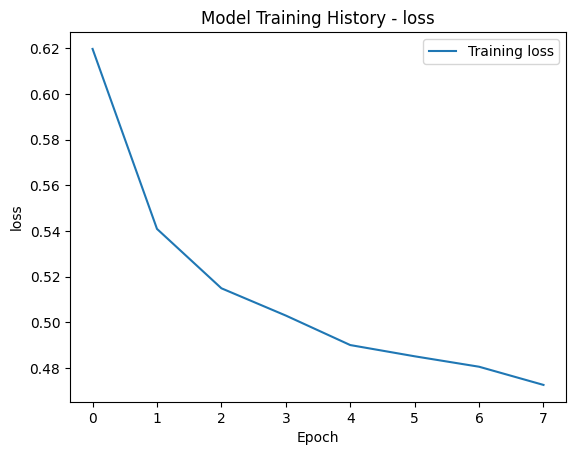

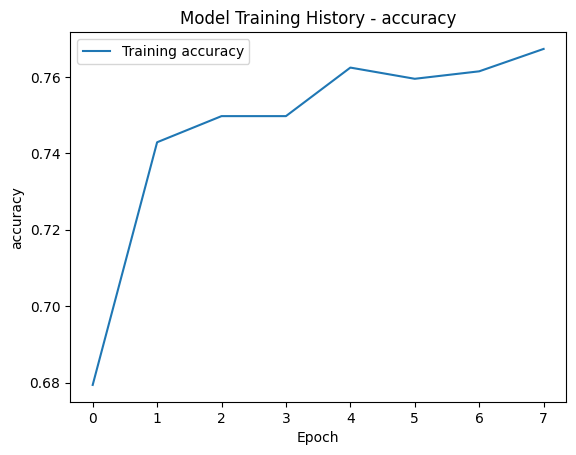

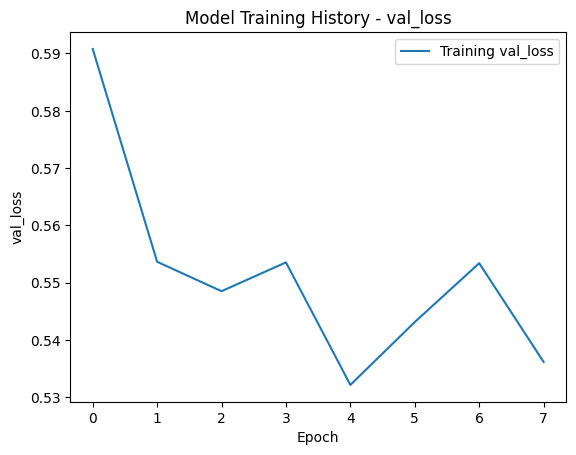

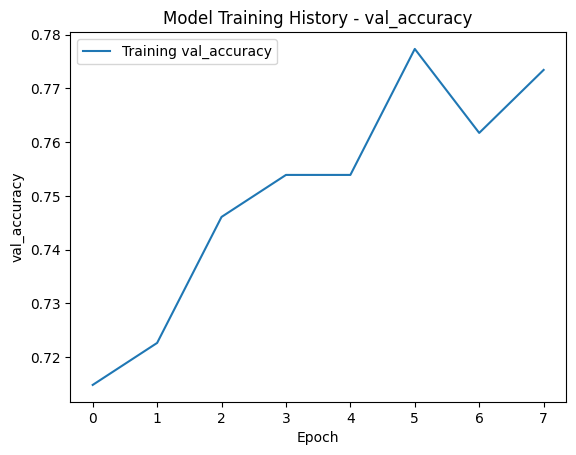

In [74]:
metrics = history_df.columns

# Plot each metric separately
for metric in metrics:
    plt.plot(history_df[metric], label='Training ' + metric)
    plt.title('Model Training History - ' + metric)
    plt.xlabel('Epoch')
    plt.ylabel(metric)
    plt.legend()
    plt.show()

## Q19. Evaluate the model's performance using the test data.

In [75]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print the test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


10/10 [==============================] - 0s 3ms/step - loss: 5.6383 - accuracy: 0.5344
Test Loss: 5.6382856369018555
Test Accuracy: 0.534375011920929


## Conclusion

- The test loss indicates the average loss of the model's predictions on the test data, and the test accuracy represents the percentage of correctly predicted samples in the test data.

- In this case, the model achieved a test accuracy of approximately 53.44% and a test loss of 5.638. Remember that these values are specific to the model and dataset used in the evaluation.




